## Data ingestion

In [114]:
#importación de librerías
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns


In [56]:
### Cargar tablas de datos desde github ###
retirement_info ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/retirement_info.csv'
general_data= 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/general_data.csv'
employee_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/employee_survey_data.csv'
out_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/out_time.csv'
in_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/in_time.csv'
manager_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/manager_survey_data.csv'

In [57]:
df_general = pd.read_csv(general_data) # datos generales de los empleados
df_manager_s = pd.read_csv(manager_survey_data) #encuesta del gerente de desempeño de los empleados
df_retirement = pd.read_csv(retirement_info) # información de empleados que se retiran de la empresa
df_employee_s = pd.read_csv(employee_survey_data) # encuesta de los empleados nivel de satisfacción laboral
df_in= pd.read_csv(in_time) # el horario de ingreso de cada empleado
df_out= pd.read_csv(out_time) # el horario de salida de cada empleado 

In [58]:
df_manager_s.head(5)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [59]:
df_employee_s.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [60]:
df_general.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [61]:
df_general['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

In [62]:
df_retirement.head(5)

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/7/2016,Resignation,Stress
2,14,Yes,8/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,8/2/2016,Resignation,Salary


In [63]:
df_in


,Unnamed: 0,1/1/2015,2/1/2015,5/1/2015,6/1/2015,7/1/2015,8/1/2015,9/1/2015,12/1/2015,13/1/2015,...,18/12/2015,21/12/2015,22/12/2015,23/12/2015,24/12/2015,25/12/2015,28/12/2015,29/12/2015,30/12/2015,31/12/2015
0,1,NaN,1/2/15 9:43,1/5/15 10:08,1/6/15 9:54,1/7/15 9:34,1/8/15 9:51,1/9/15 10:09,1/12/15 9:42,1/13/15 10:13,...,NaN,12/21/15 9:55,12/22/15 10:04,12/23/15 10:14,12/24/15 10:11,NaN,12/28/15 10:13,12/29/15 10:03,12/30/15 9:54,12/31/15 10:12
1,2,NaN,1/2/15 10:15,1/5/15 10:21,NaN,1/7/15 9:45,1/8/15 10:09,1/9/15 9:43,1/12/15 10:00,1/13/15 10:43,...,12/18/15 10:37,12/21/15 9:49,12/22/15 10:33,12/23/15 10:12,NaN,NaN,12/28/15 9:31,12/29/15 9:55,12/30/15 10:32,12/31/15 9:27
2,3,NaN,1/2/15 10:17,1/5/15 9:50,1/6/15 10:14,1/7/15 9:47,1/8/15 10:03,1/9/15 10:05,1/12/15 10:03,1/13/15 10:21,...,12/18/15 10:15,12/21/15 10:10,12/22/15 9:44,12/23/15 10:15,12/24/15 10:07,NaN,12/28/15 9:42,12/29/15 9:43,12/30/15 9:34,12/31/15 10:28
3,4,NaN,1/2/15 10:05,1/5/15 9:56,1/6/15 10:11,1/7/15 9:37,1/8/15 10:02,1/9/15 10:08,1/12/15 10:13,1/13/15 9:53,...,12/18/15 10:17,12/21/15 9:58,12/22/15 10:04,12/23/15 10:11,12/24/15 9:43,NaN,12/28/15 9:52,12/29/15 9:33,12/30/15 10:18,12/31/15 10:01
4,5,NaN,1/2/15 10:28,1/5/15 9:49,1/6/15 9:45,1/7/15 9:49,1/8/15 10:19,1/9/15 10:00,1/12/15 10:29,1/13/15 9:59,...,12/18/15 9:58,12/21/15 10:03,12/22/15 10:10,12/23/15 10:13,12/24/15 9:44,NaN,12/28/15 10:05,12/29/15 10:30,12/30/15 9:18,12/31/15 9:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,1/2/15 9:20,1/5/15 10:17,1/6/15 10:26,1/7/15 10:06,1/8/15 9:45,1/9/15 9:49,1/12/15 9:37,1/13/15 9:25,...,12/18/15 10:01,12/21/15 10:25,12/22/15 10:16,12/23/15 10:04,12/24/15 9:45,NaN,12/28/15 10:15,12/29/15 10:10,12/30/15 9:28,12/31/15 10:00
4406,4407,NaN,1/2/15 10:03,NaN,1/6/15 9:44,1/7/15 9:42,1/8/15 10:00,1/9/15 9:44,1/12/15 10:07,1/13/15 10:05,...,12/18/15 9:27,12/21/15 9:41,12/22/15 9:50,12/23/15 10:32,12/24/15 9:47,NaN,12/28/15 9:54,12/29/15 10:13,12/30/15 10:21,12/31/15 10:09
4407,4408,NaN,1/2/15 10:01,1/5/15 9:33,1/6/15 9:49,1/7/15 10:28,1/8/15 9:47,1/9/15 10:01,1/12/15 9:49,1/13/15 9:47,...,12/18/15 10:00,12/21/15 9:51,12/22/15 10:02,12/23/15 9:58,12/24/15 9:56,NaN,12/28/15 9:59,NaN,12/30/15 10:02,12/31/15 10:03
4408,4409,NaN,1/2/15 10:17,1/5/15 10:02,1/6/15 10:12,1/7/15 10:12,1/8/15 9:42,NaN,1/12/15 10:00,1/13/15 9:48,...,12/18/15 9:54,12/21/15 10:01,12/22/15 10:10,12/23/15 9:42,12/24/15 9:56,NaN,12/28/15 9:55,12/29/15 9:54,12/30/15 10:15,12/31/15 9:56


In [64]:
df_out.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Comprensión y limpieza de datos

En este sección de exploran las bases de datos, se verifican datos nulos y se asigna el tipo de dato correcto para cada variable. 

1. Exploración de tipo de datos, nulos, información de variables

In [65]:
df_general.info() # solo hay nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [66]:
df_manager_s.info() # no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [67]:
df_employee_s.info() # hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [68]:
df_retirement.info() # si hay nulos, pero solo en las razones de la renuncia 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  641 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [69]:
#df_in.isnull().sum()# si hay nulos

In [70]:
#df_out.isnull().sum() # hay nulos

In [71]:
lista = [ 'Attrition', 'retirementType','resignationReason']
for i in lista:
    print(i)
    print(df_retirement[i].unique())
    print('______________________________________________________')

Attrition
['Yes']
______________________________________________________
retirementType
['Resignation' 'Fired']
______________________________________________________
resignationReason
['Others' 'Stress' 'Salary' nan]
______________________________________________________


In [72]:
lista = [ 'Attrition', 'retirementType','resignationReason']
for i in lista:
    print(i)
    print(df_retirement[i].value_counts())
    print('______________________________________________________')

Attrition
Yes    711
Name: Attrition, dtype: int64
______________________________________________________
retirementType
Resignation    641
Fired           70
Name: retirementType, dtype: int64
______________________________________________________
resignationReason
Others    323
Salary    189
Stress    129
Name: resignationReason, dtype: int64
______________________________________________________


2. Modificaciones a la base de datos generales de los empleados (eliminación datos nulos y cambio de tipo de variable)

In [73]:
obj = (df_general.dtypes == object) #Filtrar variables categóricas
obj_cols = [c for c in obj.index if obj[c]] 
df_general_obj = df_general[obj_cols]
df_general_obj.head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [74]:
lista = df_general_obj.columns
for i in lista:
    print(i)
    print(df_general[i].value_counts())
    print('______________________________________________________')

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
______________________________________________________
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
______________________________________________________
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
______________________________________________________
Gender
Male      2646
Female    1764
Name: Gender, dtype: int64
______________________________________________________
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Direc

In [75]:
lista = [ 'JobRole', 'MaritalStatus']
for i in lista:
    print(i)
    print(df_general_obj[i].value_counts())
    print('______________________________________________________')

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
______________________________________________________
MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64
______________________________________________________


In [76]:
df_general.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [77]:
df_general['EmployeeCount'].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [78]:
df_general['StockOptionLevel'].value_counts()

0    1893
1    1788
2     474
3     255
Name: StockOptionLevel, dtype: int64

In [79]:
#eliminar EmployeeCount, Over18
#Desconocimiento sobre StockOptionLevel, YearsSinceLastPromotion

In [80]:
df_general = df_general.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

In [81]:
#eliminación de datos nulos de la base datos generales de los empleados, 
df_general = df_general.dropna()

In [82]:
#Cambio tipo de variable 
df_general= df_general.astype({'TotalWorkingYears' : int })
df_general= df_general.astype({'NumCompaniesWorked' : int })


In [83]:
df_general['TotalWorkingYears'].unique()

array([ 1,  6,  5, 13,  9, 28, 10, 21, 16, 37,  7,  3, 15,  8, 12, 17, 19,
       22,  2,  4, 23,  0, 11, 24, 25, 20, 14, 26, 18, 30, 36, 31, 33, 32,
       34, 40, 29, 35, 27, 38])

In [84]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4382 non-null   int64 
 1   BusinessTravel           4382 non-null   object
 2   Department               4382 non-null   object
 3   DistanceFromHome         4382 non-null   int64 
 4   Education                4382 non-null   int64 
 5   EducationField           4382 non-null   object
 6   EmployeeID               4382 non-null   int64 
 7   Gender                   4382 non-null   object
 8   JobLevel                 4382 non-null   int64 
 9   JobRole                  4382 non-null   object
 10  MaritalStatus            4382 non-null   object
 11  MonthlyIncome            4382 non-null   int64 
 12  NumCompaniesWorked       4382 non-null   int32 
 13  PercentSalaryHike        4382 non-null   int64 
 14  StockOptionLevel         4382 non-null  

3. Modificaciones a la base de la encuesta de empleados

In [85]:
df_employee_s['EnvironmentSatisfaction'].value_counts()

3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

In [86]:
#eliminación de datos nulos 
df_employee_s = df_employee_s.dropna()

In [87]:
#Cambio tipo de variable float a int
df_employee_s= df_employee_s.astype({'EnvironmentSatisfaction' : int })
df_employee_s= df_employee_s.astype({'JobSatisfaction' : int })
df_employee_s= df_employee_s.astype({'WorkLifeBalance' : int })

4. Modificación de la base de datos de la encuesta del gerente

In [88]:
df_manager_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Nota: no se hizo ninguna modificación debido a que no hay nulos y las variables tienen asignada una tipo de dato correcto

5. Modificación de la base de datos de los empleados retirados de la empresa

In [89]:
df_retirement.info() #existen datos nulos en la variable de razones de renuncia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  641 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [90]:
df_retirement['resignationReason'].value_counts()

Others    323
Salary    189
Stress    129
Name: resignationReason, dtype: int64

In [91]:
#se llenan los datos nulos con una nueva categoría llamada "no information"
df_retirement['resignationReason']= df_retirement['resignationReason'].fillna('No information')

Nota: no se tendrán en cuenta las bases de datos "in_time" y "out_time" debido a que no se encontrarón relvantes para el estudio. 

## Análisis exploratorio

In [92]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que se retiraron?
df = pd.merge(df_retirement, df_employee_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,701.000000,701.000000,701.000000
mean,2.465050,2.466476,2.666191
std,1.166432,1.115131,0.815816
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000


In [93]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que aún continuan en la empresa?
df = pd.merge(df_retirement, df_employee_s, how = 'right', on = 'EmployeeID')
df['Attrition'] = df['Attrition'].fillna('No')
df[df['Attrition'] == 'No'].describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,3626.000000,3626.000000,3626.000000,3626.000000
mean,2209.745725,2.774683,2.774959,2.779923
std,1274.074586,1.071115,1.091960,0.682466
min,1.000000,1.000000,1.000000,1.000000
25%,1111.500000,2.000000,2.000000,2.000000
50%,2216.500000,3.000000,3.000000,3.000000
75%,3306.750000,4.000000,4.000000,3.000000
max,4409.000000,4.000000,4.000000,4.000000


In [94]:
#¿Cuáles son los puntajes promedio de la calificación del gerente de las personas que se retiraron?
df = pd.merge(df_retirement, df_manager_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,JobInvolvement,PerformanceRating
count,711.000000,711.000000
mean,2.704641,3.172996
std,0.761739,0.378510
min,1.000000,3.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,4.000000,4.000000


In [95]:
#¿Cuál es el rol en la compañia en el que más personas se retiraron?
df_GR = pd.merge(df_retirement, df_general, how = 'left', on = 'EmployeeID')
base = df_GR.groupby(['JobRole'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.bar(base, x = 'JobRole', y='TotalPeople',
             title= '<b>Job role of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width = 700)

fig.update_layout(
    xaxis_title = 'Job Role',
    yaxis_title = 'Total people',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [96]:
#¿Cuál es la edad en la que más personas se retiraron?
df_GR_groups = df_GR.copy(deep = True)
df_GR_groups['Age'] = df_GR_groups['Age'].apply(lambda x: "G1" if (x >=19) & (x <=25) else "G2" if (x >=26) & (x <=30) else "G3" if (x >=31) & (x <=35) else "G4" if (x >=36) & (x <=40) else "G5")
df_GR_groups.groupby(['Age'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

,Age,TotalPeople
0,G3,180
1,G5,172
2,G2,165
3,G1,120
4,G4,74


In [97]:
#Cuál es el salario más alto de las personas que se retiraron?
df_GR_groups['MonthlyIncome'] = df_GR_groups['MonthlyIncome'].apply(lambda x: "Low" if (x >=0) & (x <=28210) else "Medium" if (x >=28211) & (x <=46800) else "Medium high" if (x >=46801) & (x <=68610) else "High" if (x >=68611) & (x <=116910) else "Very high")
df_GR_groups.groupby(['MonthlyIncome'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

,MonthlyIncome,TotalPeople
0,Medium high,188
1,Low,171
2,Medium,164
3,High,101
4,Very high,87


In [98]:
#¿Cuál es el salario más alto y más bajo en la empresa?
print('Salario minimo: ', df_general['MonthlyIncome'].min())
print('Salario máximo: ', df_general['MonthlyIncome'].max())

Salario minimo:  10090
Salario máximo:  199990


In [99]:
#¿Cuál es el estado civil de las personas que se retiraron?
base = df_GR.groupby(['MaritalStatus'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.pie(base, values = 'TotalPeople', names= 'MaritalStatus',
             title= '<b>Marital status of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,  
    margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [100]:
df_GR

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason,Age,BusinessTravel,Department,DistanceFromHome,Education,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,2,Yes,15/10/2016,Resignation,Others,31.0,Travel_Frequently,Research & Development,10.0,1.0,...,Single,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0
1,7,Yes,20/7/2016,Resignation,Stress,28.0,Travel_Rarely,Research & Development,11.0,2.0,...,Single,58130.0,2.0,20.0,1.0,5.0,2.0,0.0,0.0,0.0
2,14,Yes,8/11/2016,Resignation,Others,47.0,Non-Travel,Research & Development,1.0,1.0,...,Married,57620.0,1.0,11.0,2.0,10.0,4.0,10.0,9.0,9.0
3,29,Yes,15/10/2016,Resignation,Others,44.0,Travel_Frequently,Research & Development,1.0,2.0,...,Divorced,103330.0,3.0,14.0,1.0,19.0,2.0,1.0,0.0,0.0
4,31,Yes,8/2/2016,Resignation,Salary,26.0,Travel_Rarely,Research & Development,4.0,3.0,...,Divorced,68540.0,2.0,11.0,0.0,5.0,5.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,4382,Yes,18/4/2016,Resignation,Salary,29.0,Travel_Rarely,Research & Development,7.0,1.0,...,Single,21800.0,1.0,21.0,0.0,4.0,2.0,4.0,0.0,1.0
707,4387,Yes,16/9/2016,Resignation,Others,33.0,Travel_Rarely,Sales,11.0,4.0,...,Married,71400.0,5.0,21.0,0.0,8.0,2.0,5.0,0.0,4.0
708,4389,Yes,24/5/2016,Resignation,Others,33.0,Travel_Rarely,Sales,1.0,3.0,...,Married,51470.0,7.0,11.0,0.0,13.0,2.0,9.0,1.0,7.0
709,4392,Yes,26/2/2016,Fired,No information,32.0,Travel_Rarely,Sales,23.0,1.0,...,Single,24680.0,0.0,11.0,0.0,4.0,2.0,3.0,1.0,2.0


In [101]:
#¿Cuál es el porcentaje por género de retiros según las áreas de la empresa? 
df_GRA=df_GR.groupby(['Gender','Department']) [['Attrition']].count().rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df_GRA['%'] = round(df_GRA['TotalPeople']/df_GRA['TotalPeople'].sum()*100, 2)
df_GRA.drop('TotalPeople', axis=1)

,Gender,Department,%
0,Female,Human Resources,2.84
1,Female,Research & Development,25.82
2,Female,Sales,9.36
3,Male,Human Resources,4.96
4,Male,Research & Development,37.87
5,Male,Sales,19.15


In [102]:
#¿Qué tanto viajan las personas que renuncian con relación a las personas activas en la empresa?
df = df_GR.groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df['% Active'] = round(df['TotalPeople']/df['TotalPeople'].sum()*100, 2)
df.drop('TotalPeople', axis = 1, inplace = True)

df2 = pd.merge(df_retirement, df_general, how = 'right', on = 'EmployeeID')
df2['Attrition'] = df2['Attrition'].fillna('No')
df2 = df2[df2['Attrition'] == 'No'].groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df2['% Retired'] = round(df2['TotalPeople']/df2['TotalPeople'].sum()*100, 2)
df2.drop('TotalPeople', axis = 1, inplace = True)
pd.merge(df, df2, how='inner', on = 'BusinessTravel')

,BusinessTravel,% Active,% Retired
0,Travel_Rarely,65.96,71.91
1,Travel_Frequently,28.94,16.89
2,Non-Travel,5.11,11.20


In [103]:
#¿Cuál es el departamento con más retiros en la empresa?
base = df_GR.groupby(['Department'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index().rename(columns = {'EmployeeID': 'Total retired employees'}).head(10)
fig = px.pie(base, values = 'Total retired employees', names ='Department',
             title= '<b>Total employee retirements by department<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout(
    xaxis_title = 'Department',
    yaxis_title = 'Total retired employees', 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [128]:
#¿Cuál es el departamento con mas retiros por renuncias y despidos en la empresa?
base = df_GR.groupby([df_GR['retirementType'], 'Department'])[['EmployeeID']].count().rename(columns = {'EmployeeID': 'Total retired employees'}).reset_index()
fig = px.sunburst(base, path=['retirementType', 'Department' ], values='Total retired employees', title= '<b>Department by retirements due to resignation and fired<b>', 
color_discrete_sequence=px.colors.qualitative.Dark2, width=600)

fig.show()

In [129]:
#¿Cuál es el porcentaje de retiros por departamento?
base['Total retired employees'] = base['Total retired employees'].apply(lambda x: "1,6%" if (x == 3) else "1,5%" if (x == 44) else "1,7%" if (x == 23)  else "27,3%" if (x == 52) else "13,9%" if (x == 405) else "13,2%" )
base = base.rename(columns= {'Total retired employees': 'TotalRetiredEmployees'})

fig = go.Figure(data=[go.Table( header=dict(values=[['<b>retirement Type</b>'],
                  ['<b>Department</b>'], ['<b>Total retired employees</b>']],
                    fill_color='#636EFA',
align='center',
                    font_size=20,
                    font_color = 'white',
                    height=25),
                    cells=dict(values=[base.retirementType, base.Department, base.TotalRetiredEmployees],
               fill_color='lavender',
               align=['center', 'center'], 
               font_size=20,
               height=40))])

fig.update_layout(width=650, height=700)
fig.show()

In [106]:
#Comportamiento de los retiros a través del tiempo
base = df_GR.groupby(['retirementDate'])[['Attrition']].count().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base.retirementDate,
    y=base.Attrition,
    name = 'behavior of employee retirements over time'
))
fig.update_layout(title_text='behavior of employee retirements over time', title_x=0.5, width=1200)
fig.show()

In [107]:
#Correlación de variables
df_general1 = df_general[['Age','BusinessTravel','Department', 'DistanceFromHome', 'EmployeeID','JobRole','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany' ]]
df = pd.merge(df_employee_s, df_manager_s, on = 'EmployeeID', how='left')
df = pd.merge(df, df_general1, on = 'EmployeeID', how='left')
df1 = df.dropna()
df2 = pd.merge(df_retirement, df1, on = 'EmployeeID', how='left')
df2 = df2.dropna()
df2 = df2.reset_index().drop('index', axis=1)
df2= df2.astype({'EnvironmentSatisfaction' : int })
df2= df2.astype({'JobSatisfaction' : int })
df2= df2.astype({'WorkLifeBalance' : int })
df2= df2.astype({'JobInvolvement' : int })
df2= df2.astype({'PerformanceRating' : int })
df2= df2.astype({'Age' : int })
df2= df2.astype({'DistanceFromHome' : int })
df2= df2.astype({'MonthlyIncome' : int })
df2= df2.astype({'PercentSalaryHike' : int })
df2= df2.astype({'YearsAtCompany' : int })
df4 = pd.merge(df1, df_retirement, on = 'EmployeeID', how='left')

df4['Attrition'] = df4['Attrition'].fillna('No')
lista=['resignationReason','retirementType','retirementDate']

for i in lista: 
    df4[i]=df4[i].fillna('No applicable')

df4= df4.astype({'DistanceFromHome' : int })

In [108]:
df4['DistanceFromHome'] = df4['DistanceFromHome'].apply(lambda x: "Very close" if (x >=0) & (x <=5) else "Near" if (x >=6) & (x <=10) else "in between" if (x >=11) & (x <=20) else "Far")
df4['MonthlyIncome'] = df4['MonthlyIncome'].apply(lambda x: "Low" if (x >=0) & (x <=28210) else "Medium" if (x >=28211) & (x <=46800) else "Medium high" if (x >=46801) & (x <=68610) else "High" if (x >=68611) & (x <=116910) else "Very high")
df4['YearsAtCompany'] = df4['YearsAtCompany'].apply(lambda x: "G1" if (x >=0) & (x <=2) else "G2" if (x >=3) & (x <=5) else "G3" if (x >=6) & (x <=10) else "G4" if (x >=11) & (x <=20) else "G5")
df4['Age'] = df4['Age'].apply(lambda x: "G1" if (x >=19) & (x <=25) else "G2" if (x >=26) & (x <=30) else "G3" if (x >=31) & (x <=35) else "G4" if (x >=36) & (x <=40) else "G5")
df4['PercentSalaryHike'] = df4['PercentSalaryHike'].apply(lambda x: "Low" if (x >=11) & (x <=15) else "Medium" if (x >=16) & (x <=20) else "High" )

In [109]:
df5 = df4.drop(['EmployeeID','retirementDate','EnvironmentSatisfaction',	'JobSatisfaction',	'WorkLifeBalance',	'JobInvolvement', 'PerformanceRating', 'Department', 'JobRole', 'resignationReason','PercentSalaryHike', 'MonthlyIncome'], axis = 1)
df_dummies1 = pd.get_dummies(df5)
df_dummies1 =df_dummies1.drop(['retirementType_No applicable','Attrition_No'],axis = 1)
df_dummies2 = df_dummies1[['Age_G1', 'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5','BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely',  'Attrition_Yes', 'retirementType_Fired', 'retirementType_Resignation']]
df_dummies3 = df_dummies1[['DistanceFromHome_Far',
       'DistanceFromHome_Near', 'DistanceFromHome_Very close',
       'DistanceFromHome_in between', 'YearsAtCompany_G1', 'YearsAtCompany_G2',
       'YearsAtCompany_G3', 'YearsAtCompany_G4', 'YearsAtCompany_G5',
       'Attrition_Yes', 'retirementType_Fired', 'retirementType_Resignation']]


In [111]:
df_dummies2.corr()


,Age_G1,Age_G2,Age_G3,Age_G4,Age_G5,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Attrition_Yes,retirementType_Fired,retirementType_Resignation
Age_G1,1.000000,-0.136745,-0.162189,-0.140743,-0.201974,-0.022414,-0.044386,0.053175,0.149366,0.077865,0.128044
Age_G2,-0.136745,1.000000,-0.257492,-0.223444,-0.320654,-0.025022,0.007301,0.010420,0.059461,0.007268,0.059493
Age_G3,-0.162189,-0.257492,1.000000,-0.265021,-0.380319,0.009172,0.050224,-0.049361,0.020001,0.020069,0.013683
Age_G4,-0.140743,-0.223444,-0.265021,1.000000,-0.330030,0.027022,-0.000403,-0.017693,-0.090657,-0.023984,-0.086073
Age_G5,-0.201974,-0.320654,-0.380319,-0.330030,1.000000,0.002606,-0.025494,0.020208,-0.077609,-0.049179,-0.063399
BusinessTravel_Non-Travel,-0.022414,-0.025022,0.009172,0.027022,0.002606,1.000000,-0.162529,-0.527682,-0.073200,-0.019178,-0.069566
BusinessTravel_Travel_Frequently,-0.044386,0.007301,0.050224,-0.000403,-0.025494,-0.162529,1.000000,-0.752383,0.110314,0.032117,0.103683
BusinessTravel_Travel_Rarely,0.053175,0.010420,-0.049361,-0.017693,0.020208,-0.527682,-0.752383,1.000000,-0.046100,-0.014846,-0.042817
Attrition_Yes,0.149366,0.059461,0.020001,-0.090657,-0.077609,-0.073200,0.110314,-0.046100,1.000000,0.292981,0.939229
retirementType_Fired,0.077865,0.007268,0.020069,-0.023984,-0.049179,-0.019178,0.032117,-0.014846,0.292981,1.000000,-0.053051


In [112]:
df_dummies3.corr()

,DistanceFromHome_Far,DistanceFromHome_Near,DistanceFromHome_Very close,DistanceFromHome_in between,YearsAtCompany_G1,YearsAtCompany_G2,YearsAtCompany_G3,YearsAtCompany_G4,YearsAtCompany_G5,Attrition_Yes,retirementType_Fired,retirementType_Resignation
DistanceFromHome_Far,1.000000,-0.243097,-0.345905,-0.177418,-0.032125,0.019239,0.001310,0.014766,-0.003330,-0.034529,-0.019472,-0.029072
DistanceFromHome_Near,-0.243097,1.000000,-0.525661,-0.269616,0.012244,0.018096,-0.012894,-0.010277,-0.019782,0.009269,0.000481,0.009508
DistanceFromHome_Very close,-0.345905,-0.525661,1.000000,-0.383639,0.033069,-0.047339,0.036953,-0.014228,-0.022242,-0.003059,0.018744,-0.009924
DistanceFromHome_in between,-0.177418,-0.269616,-0.383639,1.000000,-0.028920,0.023626,-0.035106,0.017563,0.056475,0.025105,-0.007483,0.028907
YearsAtCompany_G1,-0.032125,0.012244,0.033069,-0.028920,1.000000,-0.356185,-0.362149,-0.205151,-0.119830,0.208814,0.073315,0.191767
YearsAtCompany_G2,0.019239,0.018096,-0.047339,0.023626,-0.356185,1.000000,-0.429023,-0.243033,-0.141958,-0.043200,-0.011152,-0.041115
YearsAtCompany_G3,0.001310,-0.012894,0.036953,-0.035106,-0.362149,-0.429023,1.000000,-0.247102,-0.144334,-0.070182,-0.041003,-0.058578
YearsAtCompany_G4,0.014766,-0.010277,-0.014228,0.017563,-0.205151,-0.243033,-0.247102,1.000000,-0.081763,-0.094976,-0.025731,-0.089957
YearsAtCompany_G5,-0.003330,-0.019782,-0.022242,0.056475,-0.119830,-0.141958,-0.144334,-0.081763,1.000000,-0.023259,0.007131,-0.026853
Attrition_Yes,-0.034529,0.009269,-0.003059,0.025105,0.208814,-0.043200,-0.070182,-0.094976,-0.023259,1.000000,0.292981,0.939229


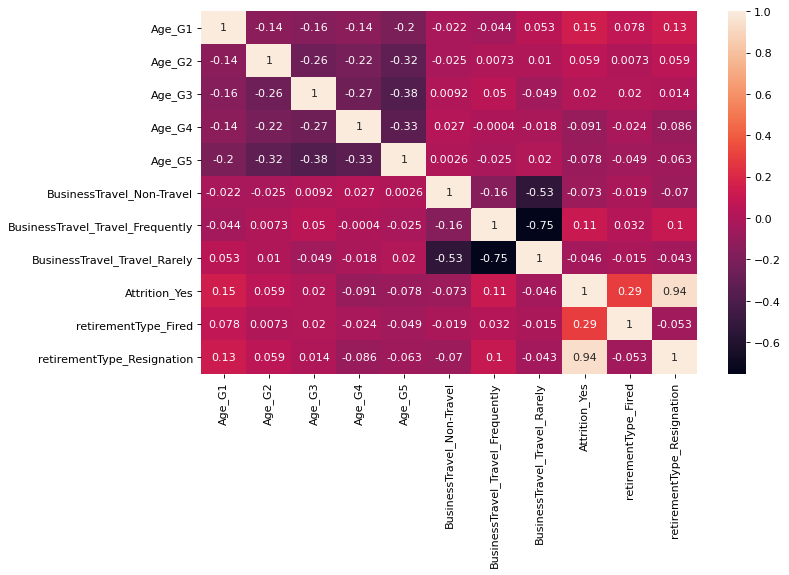

In [115]:
#Correlación de las variables Age,BusinessTravel,Attrition,retirementType 
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80);
sns.heatmap(df_dummies2.corr(), annot = True);

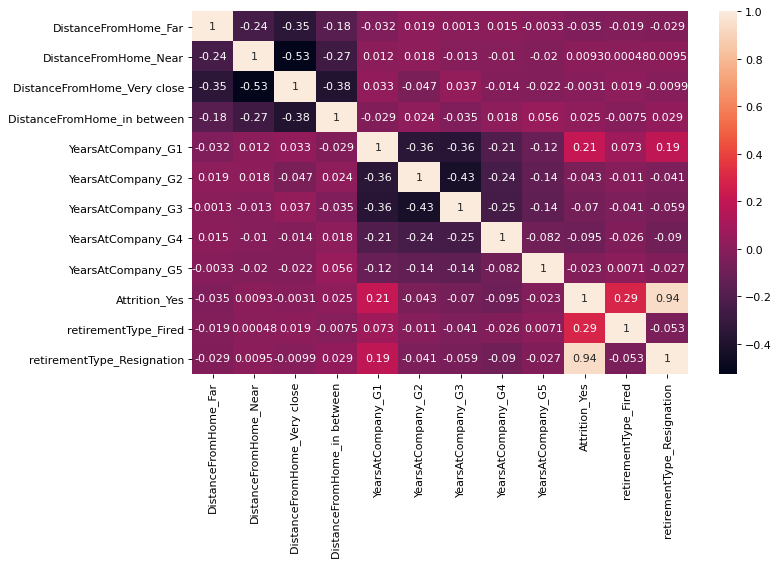

In [116]:
#Correlación de las variables DistanceFromHome,YearsAtCompany,Attrition, retirementType 
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80);
sns.heatmap(df_dummies3.corr(), annot = True);